In [302]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline  

In [303]:
data = pd.read_csv('./gifts-data.tsv', delimiter='\t')

#dropping invalid rows (every second BTW)
data = data.drop([i for i in range (1, len(data), 2)], axis=0)

#droppint working columns
to_drop = ['INPUT:theme', 'ASSIGNMENT:link', 'ASSIGNMENT:assignment_id', 'ASSIGNMENT:worker_id',
           'ASSIGNMENT:status', 'ASSIGNMENT:started', 'ACCEPT:verdict', 'ACCEPT:comment']
data = data.drop(to_drop, axis=1)

#dropping fully nan columns
for col in data.columns:
    nan_ = sum(data[col].isnull())
    if nan_ == len(data):
        data = data.drop([col], axis=1)

#checking out what's left
for key, value in data.iloc[0].iteritems():
    print (key, value)

OUTPUT:self_age 53.0
OUTPUT:self_time 2.0
OUTPUT:person_age 56.0
OUTPUT:person_tel 2.0
OUTPUT:person_auto 0.0
OUTPUT:person_hair 0.0
OUTPUT:person_time 7.0
OUTPUT:person_work 2.0
OUTPUT:self_gender 1.0
OUTPUT:person_hobby 0.0
OUTPUT:person_music 4.0
OUTPUT:person_sport 0.0
OUTPUT:person_gender 1.0
OUTPUT:person_height 3.0
OUTPUT:person_mental 0.0
OUTPUT:person_social 2.0
OUTPUT:self_variants 1.0
OUTPUT:person_animals 1.0
OUTPUT:self_gift_link nan
OUTPUT:self_gift_mark 0.0
OUTPUT:self_gift_name Аккустическая система с фм
OUTPUT:person_psycho_1 1.0
OUTPUT:person_psycho_2 0.0
OUTPUT:person_psycho_3 0.0
OUTPUT:person_psycho_4 0.0
OUTPUT:person_psycho_5 0.0
OUTPUT:person_psycho_6 0.0
OUTPUT:person_psycho_7 0.0
OUTPUT:person_psycho_8 1.0
OUTPUT:person_psycho_9 1.0
OUTPUT:self_gift_times 6.0
OUTPUT:self_gift_usage 0.0
OUTPUT:person_closeness 4.0
OUTPUT:person_education 1.0
OUTPUT:self_gift_desc_1 0.0
OUTPUT:self_gift_desc_2 0.0
OUTPUT:self_gift_desc_3 1.0
OUTPUT:self_gift_desc_4 1.0
OUTPUT:se

In [304]:
# dropping text features (but not gift description)
text_like = ['OUTPUT:person_character_word', 'OUTPUT:person_appearance_word', 'OUTPUT:person_description_text',
            'OUTPUT:person_communication_word', 'OUTPUT:person_individuality_word', 'OUTPUT:self_gift_link',]

data = data.drop(text_like, axis=1) #at the start we do not really need it

#gift description drop
data = data.drop(['OUTPUT:self_gift_name'], axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text xticklabel objects>)

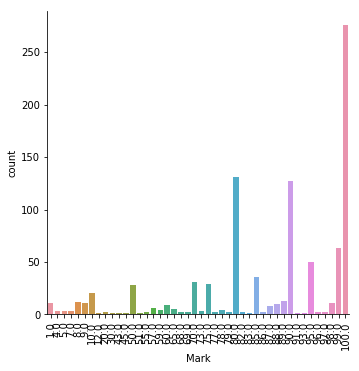

In [305]:
sns.catplot(x='Mark', kind='count', data=pd.DataFrame(data['OUTPUT:self_gift_mark_2'].values, columns=['Mark']), )
plt.xticks(rotation=90)


тут рассказать про три пика и про то что оценка от 1 до 100 для того чтобы получить три пика 80 90 100, 
которые соответствуют оценкам 3 4 и 5 в пятибальной шкале и мы бы с гарантией их не получили, если бы поставили пятибальную систему

In [306]:
#
# тут бы пошабить распределение до более адекватного
# чтобы показать улучшающуюся чиселку и восклицание "нихуя мы шарим"

# Encoding

In [307]:
# useless at first view
additional_drops = ['OUTPUT:self_gift_mark', 'OUTPUT:self_variants', 'OUTPUT:self_gift_times', 'OUTPUT:self_gift_usage',
                    'OUTPUT:self_gift_bad_usage']
data = data.drop(additional_drops, axis=1)


for key, value in data.iloc[0].iteritems():
    print (key, value)

OUTPUT:self_age 53.0
OUTPUT:self_time 2.0
OUTPUT:person_age 56.0
OUTPUT:person_tel 2.0
OUTPUT:person_auto 0.0
OUTPUT:person_hair 0.0
OUTPUT:person_time 7.0
OUTPUT:person_work 2.0
OUTPUT:self_gender 1.0
OUTPUT:person_hobby 0.0
OUTPUT:person_music 4.0
OUTPUT:person_sport 0.0
OUTPUT:person_gender 1.0
OUTPUT:person_height 3.0
OUTPUT:person_mental 0.0
OUTPUT:person_social 2.0
OUTPUT:person_animals 1.0
OUTPUT:person_psycho_1 1.0
OUTPUT:person_psycho_2 0.0
OUTPUT:person_psycho_3 0.0
OUTPUT:person_psycho_4 0.0
OUTPUT:person_psycho_5 0.0
OUTPUT:person_psycho_6 0.0
OUTPUT:person_psycho_7 0.0
OUTPUT:person_psycho_8 1.0
OUTPUT:person_psycho_9 1.0
OUTPUT:person_closeness 4.0
OUTPUT:person_education 1.0
OUTPUT:self_gift_desc_1 0.0
OUTPUT:self_gift_desc_2 0.0
OUTPUT:self_gift_desc_3 1.0
OUTPUT:self_gift_desc_4 1.0
OUTPUT:self_gift_desc_5 0.0
OUTPUT:self_gift_desc_6 2.0
OUTPUT:self_gift_desc_7 1.0
OUTPUT:self_gift_desc_8 2.0
OUTPUT:self_gift_desc_9 1.0
OUTPUT:self_gift_mark_2 100.0
OUTPUT:person_chron

In [308]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer

Y = data['OUTPUT:self_gift_mark_2']
X = data.drop('OUTPUT:self_gift_mark_2', axis=1) 

leave = ['OUTPUT:person_age', 'OUTPUT:self_age']
to_onehot = X.drop(['OUTPUT:person_age', 'OUTPUT:self_age'], axis=1).columns.values

onehotencoded = pd.get_dummies(X[to_onehot].astype(str))

to_binarize = []

def binarize_column(data , column):
    un = data[column].unique()
    un_dict = {v:k for k, v in enumerate(un)}
    data[column] = data[column].apply(lambda x: un_dict[x])
   
def binarize_set(data):
    for col in data.columns:
        binarize_column(data, col)
    
binarized = data[to_binarize].copy()
binarize_set(binarized)

In [309]:
len(to_onehot) + len(leave) == len(X.columns)

True

In [310]:
X_encoded = pd.concat([onehotencoded, X[leave]], axis=1)

#print (X_encoded)

# Missing values

In [28]:
for col in X_encoded.columns:
    nan_ = sum(X_encoded[col].isnull())
    if nan_ > 0:
        print (col, nan_/float(len(X_encoded)))

No missing values. Pretty situation.

First approach. Just encoded values and random forest.

In [29]:
from sklearn.model_selection import GridSearchCV

def score_params(*data, param_grid):
    X, Y = data
    rfr=RandomForestRegressor(random_state=42)

    

    CV_rfc = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 10)
    CV_rfc.fit(X, Y)

    print (CV_rfc.best_params_)
    rfr=RandomForestRegressor(random_state=42)
    rfr.set_params(**CV_rfc.best_params_)
    mean, std = perform_n_cv(rfr, X, Y, cv_count=10, scoring=make_scorer(mean_squared_error), iterations=10)
    print (mean, '+-' ,std)
    
def perform_n_cv(clf, x, y, cv_count, scoring, iterations):
    cv_accumulator = []
    for i in range(iterations):
        cv = cross_val_score(clf, x, y, cv=cv_count, scoring=scoring)
        cv_accumulator.append([np.mean(np.sqrt(cv)), np.std(np.sqrt(cv))])
        
    return np.mean(np.array(cv_accumulator)[:, 0]), np.mean(np.array(cv_accumulator)[:, 1])

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

score_params(X_encoded, Y,
             param_grid = {'n_estimators': [15, 20, 25, 30, 40],
                           'max_depth' : [1, 2, 3, 4, 5, None]})

{'max_depth': 2, 'n_estimators': 20}
23.9499283698 +- 3.565656351


In [31]:
# на незакодированных 23.846835097847883 +- 3.473360060146124, {'max_depth': 2, 'n_estimators': 25}
# на закодированных хуже, живите с этим

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

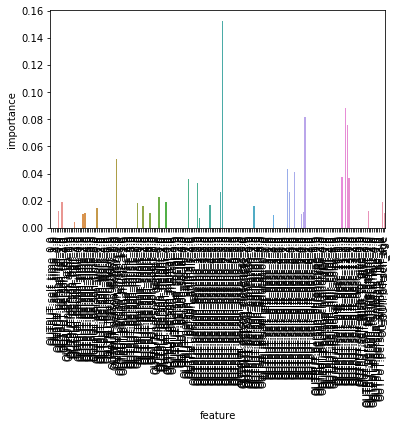

In [32]:
# feature importance JFY
clf = RandomForestRegressor(random_state=42, max_depth=2, n_estimators=25)
clf.fit(X_encoded, Y)
g= sns.barplot(x='feature', y='importance', data=pd.DataFrame(list(zip(clf.feature_importances_, X_encoded.columns)), columns=['importance', 'feature']))
plt.xticks(rotation=90)

### distribution naive changes

In [312]:
X_encoded = pd.concat([onehotencoded, X[leave]], axis=1)

y_frame = pd.DataFrame(Y.values, columns=['target']).set_index(keys=X_encoded.index)
y_frame[y_frame.target <= 10] = y_frame[y_frame.target <= 10]*10
X_encoded = X_encoded.drop(y_frame[y_frame.target < 50].index)
y_frame = y_frame.drop(y_frame[y_frame.target < 50].index)

Немного гридсерча в поисках самой маленькой ошибки.

In [64]:
#score_params(X_encoded, y_frame.target,
#             param_grid = {'n_estimators': [45, 50, 55, 60, 65, 70],
#                           'max_depth' : [2, 3, 4, 5, 6, None]})

#score_params(X_encoded, y_frame.target,
#             param_grid = {'n_estimators': [65, 68, 71, 74, 77, 80, 83],
#                           'max_depth' : [3, 4, 5, None]})

#score_params(X_encoded, y_frame.target,
#             param_grid = {'n_estimators': [72, 73, 74, 75, 76],
#                           'max_depth' : [3, 4, 5, None]})

Гридсерч не дал заметрого улучшения. Оптимальные параметры вот такие:

In [65]:
score_params(X_encoded, y_frame.target,
             param_grid = {'n_estimators': [75],
                           'max_depth' : [4, None]})

/home/kefir/miniconda3/envs/diploma/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 4, 'n_estimators': 75}
12.3049884047 +- 1.7032316923


Найдем количество всевозможных комбинаций параметров и количество уникальных комбинаций в выборке.

In [165]:
gift_ques_names_list = ['OUTPUT:self_gift_desc_1',
                        'OUTPUT:self_gift_desc_2',
                        'OUTPUT:self_gift_desc_3',
                        'OUTPUT:self_gift_desc_4',
                        'OUTPUT:self_gift_desc_5',
                        'OUTPUT:self_gift_desc_6',
                        'OUTPUT:self_gift_desc_7',
                        'OUTPUT:self_gift_desc_8',
                        'OUTPUT:self_gift_desc_9',
                        'OUTPUT:self_gift_desc_10',
                        'OUTPUT:self_gift_desc_11',
                        'OUTPUT:self_gift_desc_12',
                        'OUTPUT:self_gift_desc_13',
                       ]

gift_ques = X [gift_ques_names_list]

gift_ques

,OUTPUT:self_gift_desc_1,OUTPUT:self_gift_desc_2,OUTPUT:self_gift_desc_3,OUTPUT:self_gift_desc_4,OUTPUT:self_gift_desc_5,OUTPUT:self_gift_desc_6,OUTPUT:self_gift_desc_7,OUTPUT:self_gift_desc_8,OUTPUT:self_gift_desc_9,OUTPUT:self_gift_desc_10,OUTPUT:self_gift_desc_11,OUTPUT:self_gift_desc_12,OUTPUT:self_gift_desc_13
0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
2,1.0,2.0,1.0,1.0,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,4.0
4,0.0,0.0,0.0,1.0,4.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,0.0
6,1.0,0.0,0.0,1.0,4.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,5.0
8,0.0,0.0,0.0,1.0,4.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0
10,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
12,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
14,1.0,0.0,1.0,1.0,0.0,2.0,1.0,3.0,1.0,1.0,0.0,1.0,2.0
16,0.0,0.0,0.0,1.0,4.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0
18,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0


In [94]:
#количество всевозможных комбинаций

combinations = 1

for key in gift_ques.keys ():
    combinations = combinations * len (set (gift_ques [key]))
    #print (len (set (gift_ques [key])))

print (combinations)

1105920


In [246]:
gift_ques_list = []
unique_strings = []
gift_ques_unique = []

for i in range (0, len (gift_ques)):
    newstr = str ((gift_ques [i:i + 1]).values [0])
    
    if newstr not in unique_strings:
        unique_strings.append (newstr)
        gift_ques_unique.append (gift_ques [i:i + 1])

#for i in range (0, len (gift_ques)):   
#    gift_ques_list.append (str ((gift_ques [i:i + 1]).values [0]))

#print (gift_ques_list)

In [149]:
#print (gift_ques [gift_ques.keys () [0]].keys ())

#unique = []

#for answer in gift_ques_list:
#    if answer not in unique:
#        unique.append (answer)

#print (len (unique))

724


In [336]:
clf = Lasso(random_state=42, alpha=0.1)#RandomForestRegressor(random_state=42, max_depth=2, n_estimators=25)
clf.fit(X_encoded, y_frame.target)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)

In [339]:
Y = data['OUTPUT:self_gift_mark_2']
X = data.drop('OUTPUT:self_gift_mark_2', axis=1) 

leave = ['OUTPUT:person_age', 'OUTPUT:self_age']
to_onehot = X.drop(['OUTPUT:person_age', 'OUTPUT:self_age'], axis=1).columns.values

X_ = X.copy ()

results = []

#тут надо в цикле не энкодить все, но я не знаю, как
#from tqdm import tqdm
for i in range (0, len (gift_ques_unique)):
    if (i % 50 == 0):
        print (i, "of", len (gift_ques_unique))

    for name in gift_ques_names_list:
        #X_.at [0, name] = gift_ques.loc [[i * 2]] [name].values [0]
        X_.at [0, name] = gift_ques_unique [i] [name].values [0]

    onehotencoded = pd.get_dummies(X_[to_onehot].astype(str))

    to_binarize = []

    binarized = data[to_binarize].copy()
    binarize_set(binarized)

    X_encoded_ = pd.concat([onehotencoded, X_[leave]], axis=1)

    pred = clf.predict (X_encoded_.iloc [[0]])

    results.append ((i, pred [0]))

0 of 724
50 of 724
100 of 724
150 of 724
200 of 724
250 of 724
300 of 724
350 of 724
400 of 724
450 of 724
500 of 724
550 of 724
600 of 724
650 of 724
700 of 724


In [340]:
#print (results)

results.sort (key = lambda tup: tup [1])

#print ((results [::-1]) [:20])

#print (results)

#print (results [len (results) - 20:len(results)])
print (results [-150:])

[(18, 94.796718787282316), (206, 94.81590816866786), (368, 94.818657196157517), (378, 94.818657196157517), (490, 94.818657196157517), (386, 94.837709756729794), (166, 94.968350406973954), (238, 94.968350406973954), (357, 94.968350406973954), (374, 94.968350406973954), (536, 94.968350406973954), (668, 94.968350406973954), (274, 94.988556968367376), (355, 94.988556968367376), (400, 94.988556968367376), (71, 95.012652392256726), (186, 95.012652392256726), (592, 95.03977697688029), (593, 95.054747453052272), (408, 95.087899309062081), (541, 95.119054972076242), (83, 95.140925605328775), (113, 95.206032629516372), (511, 95.247945665178804), (81, 95.263716920833645), (237, 95.263716920833645), (296, 95.263716920833645), (519, 95.263716920833645), (618, 95.263716920833645), (664, 95.263716920833645), (62, 95.268152226572226), (146, 95.327764017845197), (537, 95.363306911107529), (33, 95.39421492454251), (64, 95.399230841642918), (110, 95.399230841642918), (163, 95.399230841642918), (289, 95.4

In [341]:
values = []
for el in list(map(list, results)):
    values.append(el[1])

(array([   7.,   34.,   74.,  116.,  163.,  128.,   74.,   65.,   42.,   21.]),
 array([  83.66943901,   85.31395463,   86.95847024,   88.60298586,
          90.24750147,   91.89201709,   93.5365327 ,   95.18104832,
          96.82556393,   98.47007955,  100.11459516]),
 <a list of 10 Patch objects>)

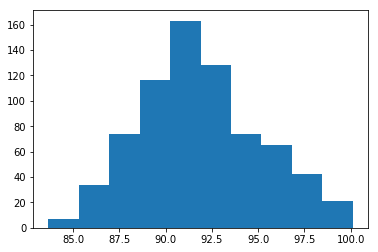

In [344]:
plt.hist(values)
#x = pd.DataFrame(list(zip(clf.feature_importances_, X_encoded.columns)))
#x=x[x[0]>0.02]
#g= sns.barplot(x='feature', y='importance', data=pd.DataFrame(list(zip(abs(clf.coef_), X_encoded.columns)), columns=['importance', 'feature']))
#plt.xticks(rotation=90)

# lasso ridge check

In [322]:
from sklearn.linear_model import Lasso, Ridge
def score_params(*data, model, param_grid):
    X, Y = data
    rfr=model#Lasso(random_state=42)

    

    CV_rfc = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 10)
    CV_rfc.fit(X, Y)

    print (CV_rfc.best_params_)
    rfr=model#Lasso(random_state=42)
    rfr.set_params(**CV_rfc.best_params_)
    mean, std = perform_n_cv(rfr, X, Y, cv_count=10, scoring=make_scorer(mean_squared_error), iterations=10)
    print (mean, '+-' ,std)

In [323]:
score_params(X_encoded, y_frame.target, model=Ridge(random_state=42),
             param_grid = {'alpha': [0.01, 0.1, 1, 10, 20, 50, 100, 500, 1000]})

/home/kefir/miniconda3/envs/diploma/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 500}
12.2238578507 +- 1.80284697806


In [331]:
reg = Lasso(random_state=42, alpha=0.1)
reg.fit(X_encoded, y_frame.target)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)

In [335]:
coefs = pd.DataFrame(list(zip(reg.coef_, X_encoded.columns)), columns=['coef', 'name'])
coefs[np.abs(coefs.coef) > 1.5]

,coef,name
28,1.701450,OUTPUT:person_work_2.0
33,-1.651739,OUTPUT:self_gender_0.0
35,2.298114,OUTPUT:person_hobby_0.0
46,-2.108517,OUTPUT:person_music_6.0
54,-2.460420,OUTPUT:person_sport_4.0
96,2.238793,OUTPUT:person_psycho_6_0.0
107,2.487853,OUTPUT:person_psycho_9_2.0
125,-3.141013,OUTPUT:self_gift_desc_2_2.0
135,1.983203,OUTPUT:self_gift_desc_5_4.0
138,-1.790005,OUTPUT:self_gift_desc_6_1.0


# Recomendation system building

In [431]:
def get_samples(pool, dataset, description, descr_columns):
    condition = [True for i in range(len(dataset))]
    for desc, col in zip(description, descr_columns):
        condition = condition & (dataset[col]==desc)
        
    return pool[condition].values[0]
        

In [365]:
# check if function is working
pool_building = pd.read_csv('./gifts-data.tsv', delimiter='\t')
pool =  pool_building['OUTPUT:self_gift_name']
pool = pool[pool.index.isin(X_encoded.index)]

description_columns = X_encoded.columns[X_encoded.columns.str.contains('self_gift_desc_')]

sample_description = X_encoded.iloc[0][description_columns].values

get_samples(pool, X_encoded, sample_description, description_columns)

0      Аккустическая система с фм
742                       delongi
Name: OUTPUT:self_gift_name, dtype: object

In [432]:
descriptions_from_pool = X_encoded[description_columns].drop_duplicates()

def rate_descriptions(model, descriptions_from_pool, person_description, description_columns):
    '''
    Person description must contain columns for present descriptions 'cause I'm lazy bastard
    '''
    rated = descriptions_from_pool.copy()
    rated['rating'] = [0 for i in range(len(rated))]
    for x in descriptions_from_pool.iterrows():
        description = x[1].values
        current_sample = person_description.copy()
        current_sample[description_columns] = description
        
        prediction = model.predict([current_sample.values])
        
        rated.loc[x[0], 'rating'] = prediction
        
    return rated

def get_proposals(model, dataset, person_description, description_columns, pool):
    rating = rate_descriptions(model,  dataset[description_columns], person_description, description_columns)
    rating = rating.sort_values('rating', ascending=False).reset_index()
    
    proposals = []
    for sample in rating.iloc[:10].iterrows():
        proposals.append(get_samples(pool,
                                     dataset,
                                     sample[1].drop(labels=['rating']).values[1:],
                                     description_columns))
        
    return proposals

In [443]:
reg = RandomForestRegressor(random_state=42, max_depth=4, n_estimators=75)
reg.fit(X_encoded, y_frame.target)
get_proposals(reg, X_encoded, X_encoded.iloc[20], description_columns, pool) #iloc 5 - ребенок

['Смартфон',
 'браслет золотой',
 'MacBook pro',
 'кольцо из белого золота',
 'Ребенок',
 'Украшение',
 'Браслет',
 'кулон',
 'Золотая цепь',
 'серьги']